<a href="https://colab.research.google.com/github/Roger8886/The-Boston-housing-prices/blob/main/%E6%B3%A2%E5%A3%AB%E9%A0%93%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##波士頓房價預測
資料簡介: 美國波士頓地區房價預測任務，該資料集是由美國人口調查局調查波士頓每個地區房價變化所收集而來。


定義問題: 連續數值(預測房價)，回歸預測

#環境準備

In [1]:
import pandas as pd
import numpy as ns

#載入資料

In [2]:
from sklearn.datasets import load_boston
#read data
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


欄位介紹: 
*   CRIM - 城鎮人均犯罪率
*   ZN - 超過 25,000 平方英尺的住宅用地比例。
*   INDUS - 每個城鎮的非零售商業用地的比例。
*   CHAS - 是否靠近河邊
*   NOX - 一氧化氮濃度（百萬分之一）
*   RM - 每個住宅的平均房間數
*   AGE - 1940年前私有住宅的住房比率
*   DIS - 與五個波士頓工做地區的加權距離
*   RAD - 徑向公路的通達指數(index of accessibility to radial highways)
*   TAX - 每10,000美元的所需繳的財產稅
*   PTRATIO - 城鎮師生比例
*   B - 黑人比例
*   LSTAT - 中下階級人口比率
*   **MEDV - 自住房屋的中位數房價**

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1UmwJHjfwVk3AhwWTc6Zx2WPH2bT5hTyi"  width="60%" height="100%" align="center" />
</p>
<p align="center">
y = w1*CRIM + w2*ZN + w3*INDUS + ...
</p>

## EDA

EDA是利用數學工具或圖表探索資料獲取知識的過程，在實際應用上可以從兩個面向觀察，分別是「特徵關聯性」和「資料分布」

特徵關聯性: 

1. 「特徵與特徵欄位之間相關性」: 找出高正相關冗余特徵
2. 「特徵與預測類別欄位相關性」: 找出跟答案高正相關重要特徵

資料分布: 找出分佈範圍是否過大
1. min
2. max
3. mean
4. std


# 資料分析

In [3]:
display(df.describe())
display(df.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

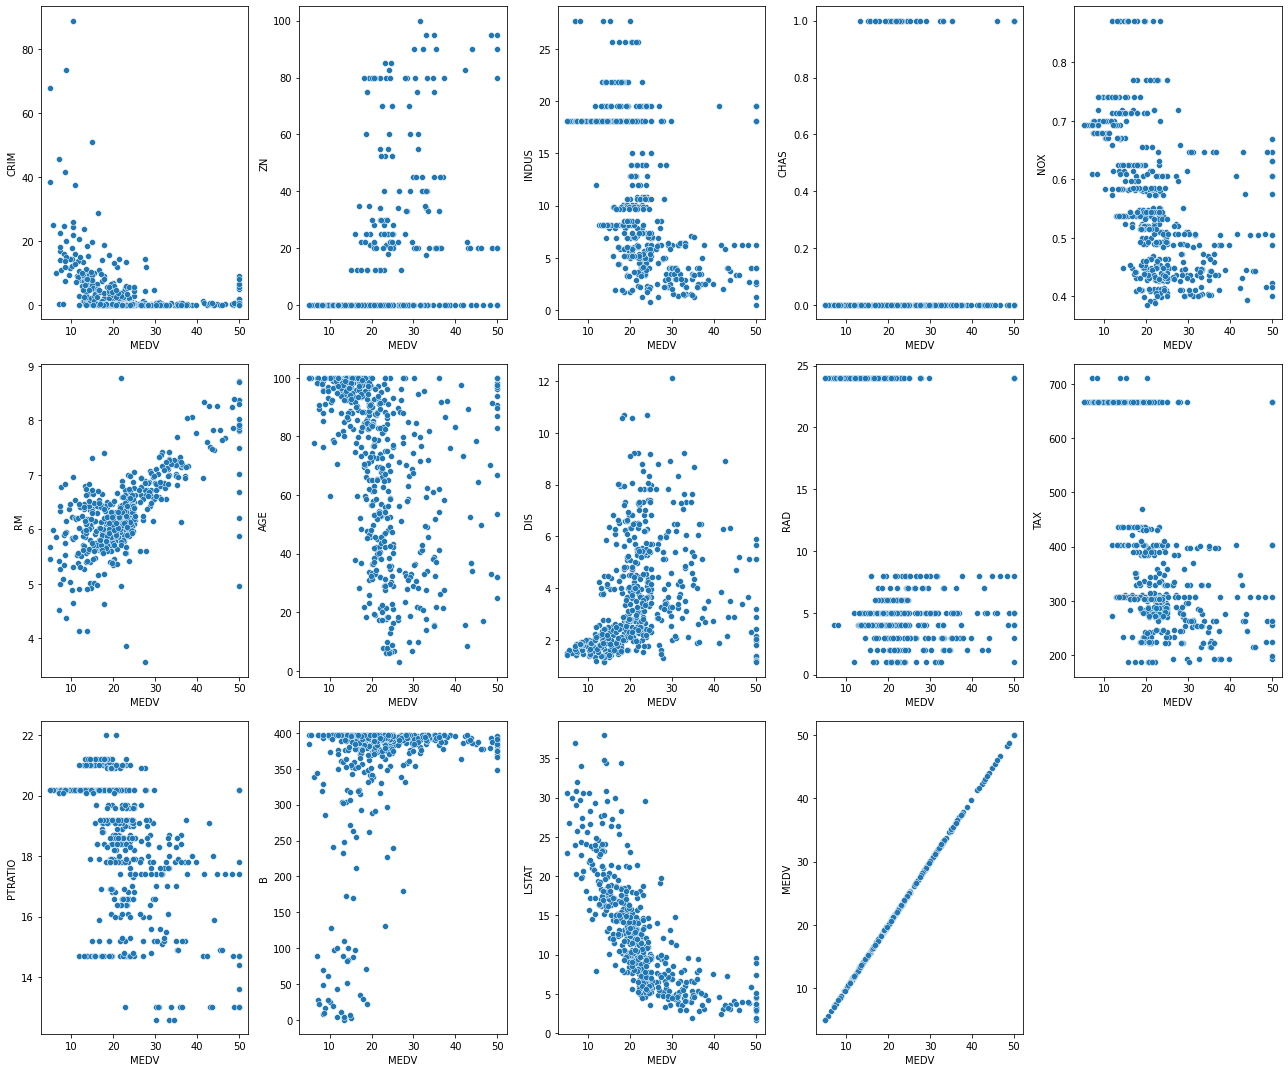

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 15)) # 調整圖表大小

# 特徵值與label的分佈圖
for idx, cols in enumerate(df):
    ax = plt.subplot(3, 5, idx+1)
    sns.scatterplot(x = df['MEDV'], y = df[cols])

plt.tight_layout()
plt.show()
# 找出與label相關的特徵們

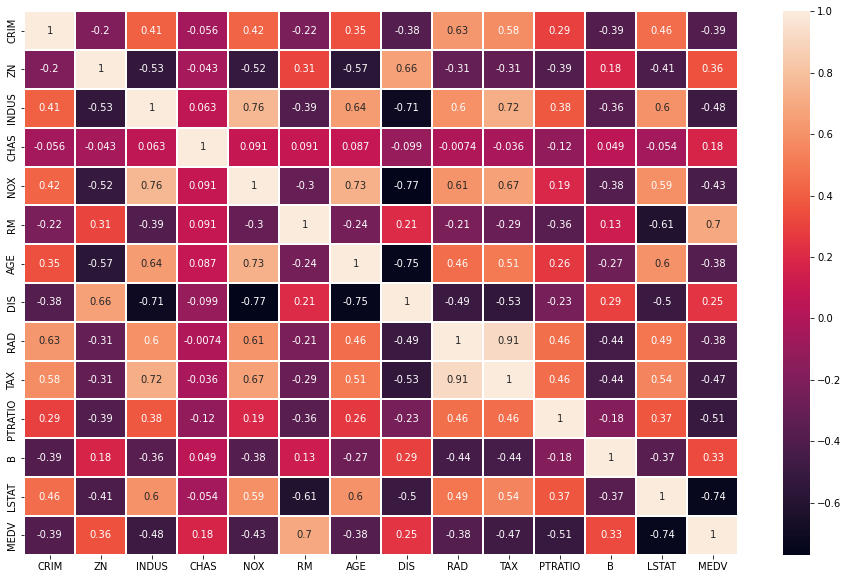

In [5]:
# 比較每個特徵間的關聯程度
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, linewidth = 1)
plt.show()

# 找出高度正相關的特徵們

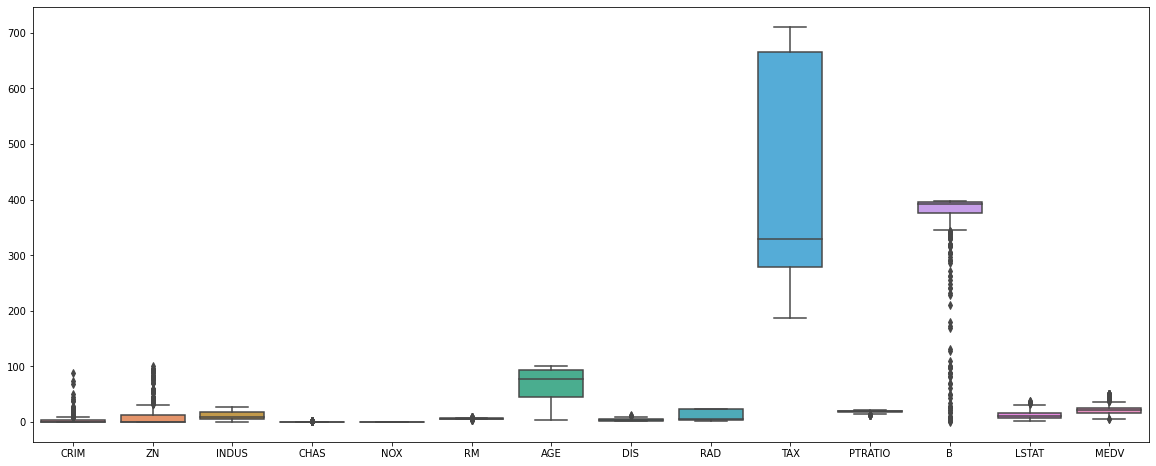

In [6]:
# 箱型圖
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()
# 找出離群值特徵們

In [7]:
# 正規化(Normalization)，將欄位數值壓縮
"""
對數值型和有序離散型欄位做正規化。

順序: 準備訓練資料 -> 正規化參數訓練 -> 訓練/測試資料正規化
"""
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.values[:, :-1])

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(np.expand_dims(df.values[:, -1], axis=1))

# y = y_scaler.inverse_transform(y_scaled) # 預測結果使用inverse_transform 

In [8]:
# 檢視正規化結果
df_describe = pd.DataFrame(X_scaled)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# 切割訓練/測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=24)

In [10]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(404, 13)

(404, 1)

(102, 13)

(102, 1)

## scikit-learning 模型預測

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 注意資料格式
# y_train.shape = [403, 1]
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# 評估模型好壞
mean_absolute_error(y_test, y_pred)

0.07304431349082957

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1dj8Z3hFX6ItA7FI25M-Mz7NVgihFs_0O"  width="60%" height="100%" align="center" />
</p>
<p align="center">
找到一條誤差總和最小的線
</p>